<a href="https://colab.research.google.com/github/tusharbelwal7/MLprojects/blob/main/Housing_price_prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# general libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
#loading the data from the file
house_d=pd.read_csv("/content/mlhousing.csv")

In [ ]:
#tells us the basic info of the table
house_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  int64  
 1   total_rooms         20640 non-null  int64  
 2   total_bedrooms      20433 non-null  float64
 3   population          20640 non-null  int64  
 4   households          20640 non-null  int64  
 5   median_income       20640 non-null  float64
 6   median_house_value  20640 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.1 MB


In [ ]:
#shows us first 10 records of the dataset
house_d.head(10)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41,880,129.0,322,126,8.3252,452600
1,21,7099,1106.0,2401,1138,8.3014,358500
2,52,1467,190.0,496,177,7.2574,352100
3,52,1274,235.0,558,219,5.6431,341300
4,52,1627,280.0,565,259,3.8462,342200
5,52,919,213.0,413,193,4.0368,269700
6,52,2535,489.0,1094,514,3.6591,299200
7,52,3104,687.0,1157,647,3.1200,241400
8,42,2555,665.0,1206,595,2.0804,226700
9,52,3549,707.0,1551,714,3.6912,261100


In [ ]:
house_d.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


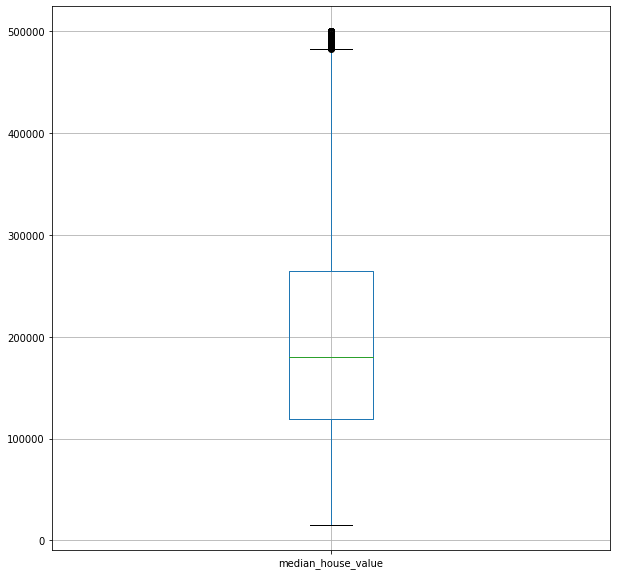

In [ ]:
#boxplot
house_d.boxplot(['median_house_value'], figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6dd8d21f70>,
      dtype=object)

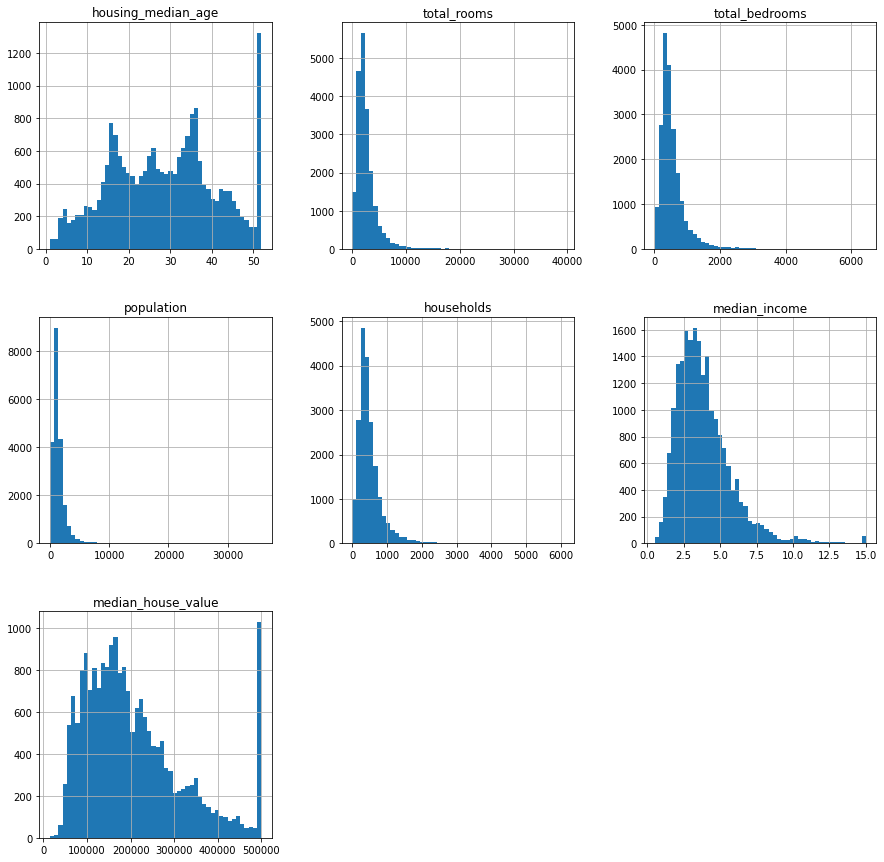

In [ ]:
#histogram
house_d.hist(bins=50, figsize=(15, 15))

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(house_d, test_size=0.2, random_state=42)
print(len(train_set), "train + ", len(test_set), "test")

16512 train +  4128 test


In [ ]:
train_set.head(10)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
14196,33,3126,627.0,2300,623,3.2596,103000
8267,49,3382,787.0,1314,756,3.8125,382100
17445,4,1897,331.0,915,336,4.1563,172600
14265,36,1421,367.0,1418,355,1.9425,93400
2271,43,2382,431.0,874,380,3.5542,96500
17848,20,5032,808.0,2695,801,6.6227,264800
6252,28,1686,417.0,1355,388,2.5192,157300
9389,37,2524,398.0,999,417,7.9892,500001
6113,5,1126,316.0,819,311,1.5000,139800
6061,5,18690,2862.0,9427,2777,6.4266,315600


In [ ]:
test_set.head(10)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,25,1505,NaN,1392,359,1.6812,47700
3024,30,2943,NaN,1565,584,2.5313,45800
15663,52,3830,NaN,1310,963,3.4801,500001
20484,17,3051,NaN,1705,495,5.7376,218600
9814,34,2351,NaN,1063,428,3.7250,278000
13311,12,4427,NaN,2400,843,4.7147,158700
7113,36,1375,NaN,670,221,5.0839,198200
7668,38,1335,NaN,1011,269,3.6908,157500
18246,4,2292,NaN,1050,584,4.8036,340000
5723,45,2332,NaN,943,339,8.1132,446600


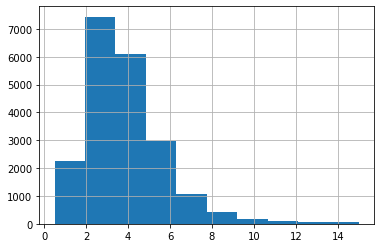

In [ ]:
house_d['median_income'].hist()

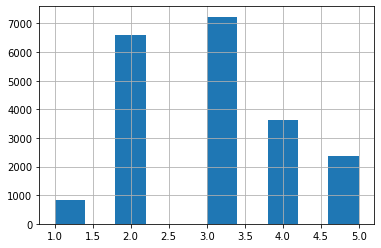

In [ ]:
house_d['income_category'] = np.ceil(house_d['median_income']/1.5)
house_d['income_category'].where(house_d['income_category']<5, 5.0, inplace=True)
house_d['income_category'].hist()

In [ ]:
# stratified sampling based on income categories
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(house_d, house_d['income_category']):
    strat_train_set = house_d.loc[train_index]
    strat_test_set = house_d.loc[test_index]

strat_test_set.head(10)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_category
5241,29,6447,1012.0,2184,960,8.2816,500001,5.0
17352,24,2020,307.0,855,283,5.0099,162500,4.0
3505,36,1453,270.0,808,275,4.3839,204600,3.0
7777,35,1653,325.0,1072,301,3.2708,159700,3.0
14155,38,3779,614.0,1495,614,4.3529,184000,3.0
7057,35,1805,387.0,1505,366,4.1667,151900,3.0
33,49,1655,366.0,754,329,1.3750,104900,1.0
17049,26,5067,750.0,1996,728,7.0001,500001,5.0
18164,16,2697,803.0,1369,723,4.4699,367400,3.0
10444,24,2303,399.0,851,379,3.9875,346500,3.0


In [ ]:
house_d['income_category'].value_counts() / len(house_d)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_category, dtype: float64

In [ ]:
strat_test_set['income_category'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_category, dtype: float64

In [ ]:
# we need to do random sampling again to include income_category column
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(house_d, test_size=0.2, random_state=42)

test_set['income_category'].value_counts() / len(test_set)

3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: income_category, dtype: float64

In [ ]:
# to drop the income_category attribute
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_category", axis=1, inplace=True)

In [ ]:
# check the table after dropping the income_category attribute
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 3965
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  4128 non-null   int64  
 1   total_rooms         4128 non-null   int64  
 2   total_bedrooms      4079 non-null   float64
 3   population          4128 non-null   int64  
 4   households          4128 non-null   int64  
 5   median_income       4128 non-null   float64
 6   median_house_value  4128 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 258.0 KB


In [ ]:
house_d = strat_train_set.copy()
house_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  16512 non-null  int64  
 1   total_rooms         16512 non-null  int64  
 2   total_bedrooms      16354 non-null  float64
 3   population          16512 non-null  int64  
 4   households          16512 non-null  int64  
 5   median_income       16512 non-null  float64
 6   median_house_value  16512 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.0 MB


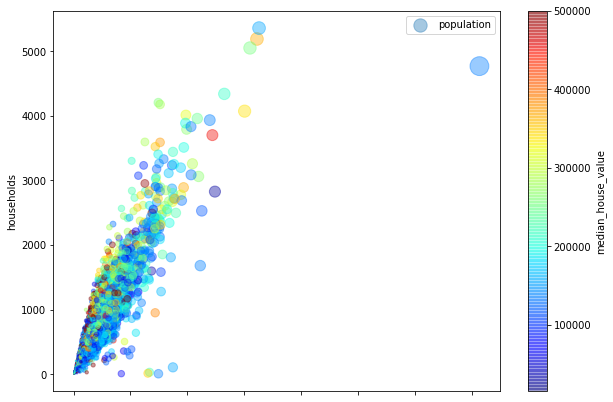

In [ ]:
house_d.plot(kind='scatter',x='population',y='households' ,alpha=0.4,
    s=house_d['population']/100, label='population', figsize=(10,7),
    c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

In [ ]:
corr_matrix = house_d.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6dd828f220>,
      dtype=object)

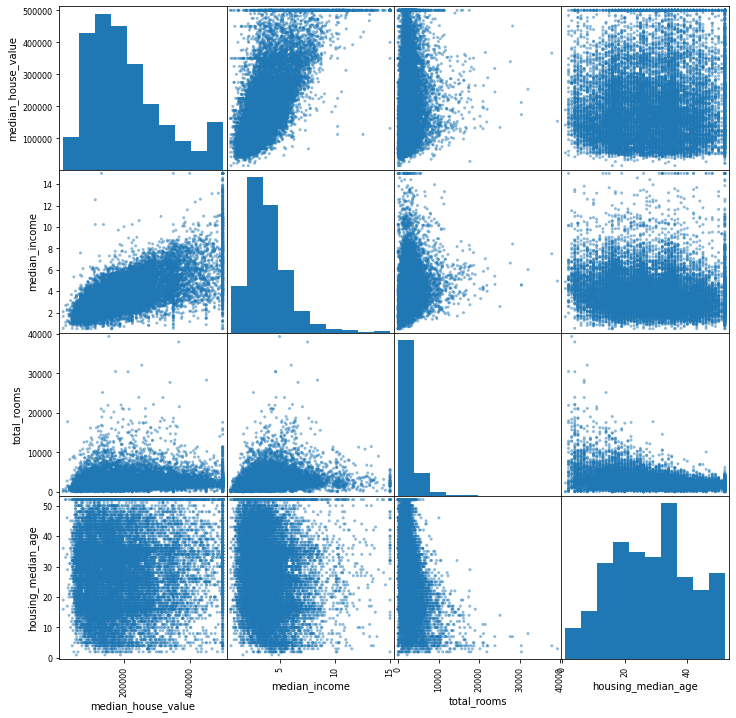

In [ ]:

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
pd.plotting.scatter_matrix(house_d[attributes], figsize=(12,12))

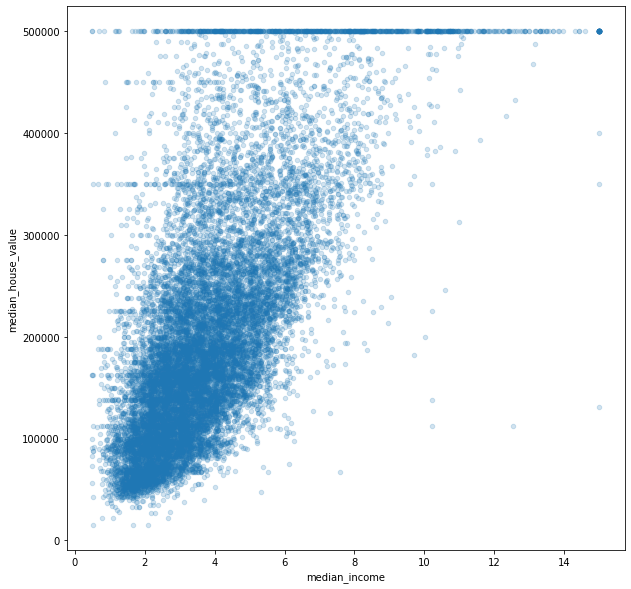

In [ ]:
house_d.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2, figsize=(10,10))

In [ ]:
# calculated attributes
house_d['rooms_per_household'] = house_d['total_rooms']/house_d['households']
house_d['bedrooms_per_room'] = house_d['total_bedrooms']/house_d['total_rooms']
house_d['population_per_household'] = house_d['population']/house_d['households']

# checkout the correlations again
corr_matrix = house_d.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [ ]:
house_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        16512 non-null  int64  
 1   total_rooms               16512 non-null  int64  
 2   total_bedrooms            16354 non-null  float64
 3   population                16512 non-null  int64  
 4   households                16512 non-null  int64  
 5   median_income             16512 non-null  float64
 6   median_house_value        16512 non-null  int64  
 7   rooms_per_household       16512 non-null  float64
 8   bedrooms_per_room         16354 non-null  float64
 9   population_per_household  16512 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.4 MB


In [ ]:
house_d = strat_train_set.drop("median_house_value", axis=1)
house_d_labels = strat_train_set["median_house_value"].copy()
house_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  16512 non-null  int64  
 1   total_rooms         16512 non-null  int64  
 2   total_bedrooms      16354 non-null  float64
 3   population          16512 non-null  int64  
 4   households          16512 non-null  int64  
 5   median_income       16512 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 903.0 KB


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(house_d)
imputer.statistics_

array([  29.     , 2119.     ,  433.     , 1164.     ,  408.     ,
          3.54155])

In [ ]:
house_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  16512 non-null  int64  
 1   total_rooms         16512 non-null  int64  
 2   total_bedrooms      16354 non-null  float64
 3   population          16512 non-null  int64  
 4   households          16512 non-null  int64  
 5   median_income       16512 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 903.0 KB


In [ ]:
x = imputer.transform(house_d)
house_tr = pd.DataFrame(x, columns=house_d.columns)
house_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  16512 non-null  float64
 1   total_rooms         16512 non-null  float64
 2   total_bedrooms      16512 non-null  float64
 3   population          16512 non-null  float64
 4   households          16512 non-null  float64
 5   median_income       16512 non-null  float64
dtypes: float64(6)
memory usage: 774.1 KB


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 1,2,3,4

class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/ X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


house_d.head()

NameError: ignored

In [ ]:
attribute_adder = CombineAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attribute_adder.transform(house_d.values)
housing_extra_attribs

array([[2.90000000e+01, 3.87300000e+03, 7.97000000e+02, ...,
        2.17360000e+00, 5.48583569e+00, 3.16855524e+00],
       [7.00000000e+00, 5.32000000e+03, 8.55000000e+02, ...,
        6.33730000e+00, 6.92708333e+00, 2.62369792e+00],
       [4.40000000e+01, 1.61800000e+03, 3.10000000e+02, ...,
        2.87500000e+00, 5.39333333e+00, 2.22333333e+00],
       ...,
       [4.80000000e+01, 7.07000000e+02, 1.66000000e+02, ...,
        3.17970000e+00, 4.11046512e+00, 2.66279070e+00],
       [1.40000000e+01, 3.15500000e+03, 5.80000000e+02, ...,
        4.19640000e+00, 6.29740519e+00, 2.41117764e+00],
       [2.70000000e+01, 1.07900000e+03, 2.22000000e+02, ...,
        3.13190000e+00, 5.47715736e+00, 3.17258883e+00]])

In [ ]:
# check the stats of the training set for feature scaling
house_d.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884
std,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931
min,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950
50%,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550
75%,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325
max,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(house_d)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
num_attribs = list(house_d)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', CategoricalEncoder()),])

In [ ]:
housing_num_tr = num_pipeline.fit_transform(house_d)
housing_num_tr.shape
num_attribs

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [ ]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline)])
house_d_prepared = full_pipeline.fit_transform(house_d)
house_d_prepared.shape

(16512, 9)

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(house_d_prepared, house_d_labels)

LinearRegression()

In [ ]:
# test out the linear regression model
some_data = house_d.iloc[:5]  # choose the first five observations
some_labels = house_d_labels.iloc[:5]
some_data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,29,3873,797.0,2237,706,2.1736
15502,7,5320,855.0,2015,768,6.3373
2908,44,1618,310.0,667,300,2.8750
14053,24,1877,519.0,898,483,2.2264
20496,27,3536,646.0,1837,580,4.4964


In [ ]:
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared
print('Actual Prices:', list(some_labels))

Actual Prices: [72100, 279600, 82700, 112500, 238300]


In [ ]:
# print predicted prices
print('Predicted Prices:', lin_reg.predict(some_data_prepared))

Predicted Prices: [118837.78229069 279251.37727745 182757.86195287 155805.81368508
 218697.30045248]


In [ ]:
from sklearn.metrics import mean_squared_error
house_d_predictions = lin_reg.predict(house_d_prepared)
lin_mse = mean_squared_error(house_d_labels, house_d_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

75524.371123334

In [ ]:
house_d_labels.describe()

count     16512.000000
mean     207005.322372
std      115701.297250
min       14999.000000
25%      119800.000000
50%      179500.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [ ]:
# Try Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(house_d_prepared, house_d_labels)
housing_predictions = tree_reg.predict(house_d_prepared)
tree_mse = mean_squared_error(house_d_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
# 10-fold cross validation
from sklearn.model_selection import cross_val_score

# for decision tree
tree_scores = cross_val_score(tree_reg, house_d_prepared, house_d_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

# for linear regression
lin_scores = cross_val_score(lin_reg, house_d_prepared, house_d_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [ ]:
print('Scores:', tree_rmse_scores)

Scores: [92633.16654805 86917.26461097 89637.13357064 91949.27016698
 87416.9621665  93851.50769874 93950.19023974 91519.96739853
 86589.41788307 91580.09605339]


In [ ]:
print('Mean:', tree_rmse_scores.mean())

Mean: 90604.49763366014


In [ ]:
print('Standard Deviation:', tree_rmse_scores.std())

Standard Deviation: 2650.721592823669


In [ ]:
print('Scores:', lin_rmse_scores)

Scores: [77580.83355177 72046.16456282 72442.72020013 75002.7082874
 72479.05192469 79706.8082047  84901.60524764 75739.69361674
 74328.79112779 77055.86678906]


In [ ]:
print('Mean:', lin_rmse_scores.mean())

Mean: 76128.42435127326


In [ ]:
print('Standard Deviation:', lin_rmse_scores.std())

Standard Deviation: 3754.562333503559


In [ ]:
# Try Random Forest, which is an Ensemble Learning model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(house_d_prepared, house_d_labels)

forest_scores = cross_val_score(forest_reg, house_d_prepared, house_d_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print('Mean:', forest_rmse_scores.mean())

Mean: 64904.239946243586
